## Regression Analysis

In [10]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss

-------------------
## Linear regression by least squares

In this part, we will take another look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the *illiteracy* rate.

The Python code below plots the fertility versus illiteracy and computes the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

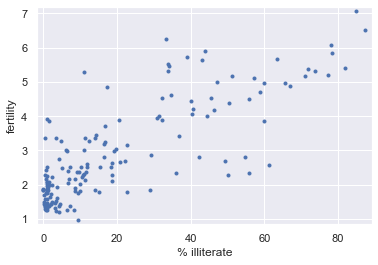

Pearson correlation coefficient between illiteracy and fertility: 0.80413


In [11]:
df = pd.read_csv('female_literacy_fertility.csv')

illiteracy = 100 - df['female literacy']

fertility = df['fertility']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Pearson correlation coefficient between illiteracy and fertility: {:.5f}'.format(pearson_r(illiteracy, fertility)))

We will assume that fertility is a linear function of the female illiteracy rate: `f=ai+b`, where `a` is the slope and `b` is the intercept. 

We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. 

The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line .

Next we write code to plot the data and the best fit line and print out the slope and intercept.

slope = 0.04979854809063423
intercept = 1.888050610636557


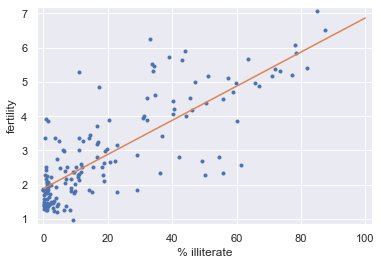

In [12]:
# Perform linear regression: a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the slope and intercept
print('slope =', a)
print('intercept =', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([0, 100])
y_theor = a * x_theor + b

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

The function `np.polyfit()` that you used above to get your regression parameters finds the optimal slope and intercept. It is optimizing the the _residual sum of squares (RSS)_, also known as the _sum of squared residuals (SSR)_ or the _sum of squared estimate of errors (SSE)_, which can be defined as "the sum of the squares of residuals (deviations predicted from actual empirical values of data)." (see https://en.wikipedia.org/wiki/Residual_sum_of_squares)

Next we write code to plot the function that is being optimized, the RSS, versus the slope parameter `a`.

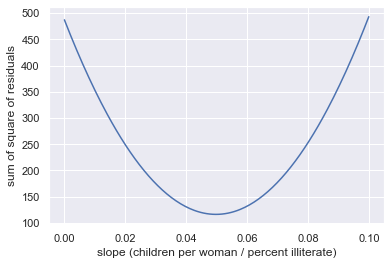

In [13]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = []

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss.append(np.sum((fertility - a*illiteracy - b)**2))

# Plot the RSS
plt.plot(a_vals, rss)
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

The slope above is minimal around 0.05, not too far away from where our regression model determined the optimal slope was.

-------------------
## Anscombe's quartet

The Anscombe's quartet is a collection of four small data sets that have nearly identical simple descriptive statistics, yet have very different distributions. Each dataset consists of 11 `(x,y)` points. The quartet was created in 1973 by the statistician Francis Anscombe to demonstrate: the importance of visualization and exploratory data analysis (EDA), the effect of outliers and other influential observations on statistical properties, and the limitations of summary statistics (\*).

(\*) See https://heap.io/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story if you're interested.

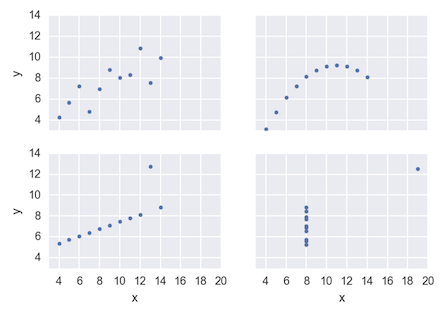 

The Python code below performs a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [14]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

slope = 0.5000909090909095
intercept = 3.0000909090909076


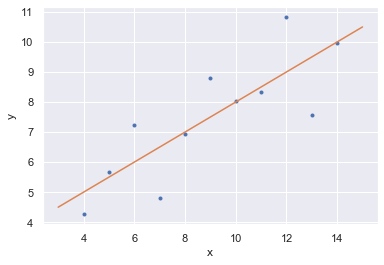

In [15]:
# Perform linear regression: a, b
a, b = np.polyfit(x1, y1, 1)

# Print the slope and intercept
print('slope =', a)
print('intercept =', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### Linear regression on all Anscombe data

Next we write code to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, i.e. compute the slope and intercept for each set. 

In [16]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

for i in range(0, 4):
    lr_coeffs=np.polyfit(anscombe_x[i], anscombe_y[i], 1)
    print(lr_coeffs)

[0.50009091 3.00009091]
[0.5        3.00090909]
[0.49972727 3.00245455]
[0.49990909 3.00172727]


The difference in the linear regression coefficients above is negligible.

-------------------
## Regression using scikit-learn

Now that we know the basics of linear regression, we will switch to scikit-learn, a powerful, workflow-oriented library for data science and machine learning.

The Python code below shows a simple linear regression example using scikit-learn. Note the use of the `fit()` and `predict()` methods.

[2.9776566]
-1.903310725531119


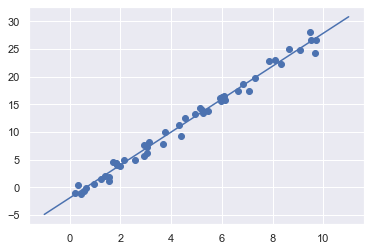

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data around the y = ax+b line where a=3 and b=-2
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 3 * x - 2 + rng.randn(50)

from sklearn.linear_model import LinearRegression

# Note: If you get a "ModuleNotFoundError: No module named 'sklearn'" error message, don't panic.
# It probably means you'll have to install the module by hand if you're using pip. 
# If you're using conda, you should not see any error message.

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]
X.shape

model.fit(X, y)
print(model.coef_)
print(model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Polynomial regression

One way to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take the multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

The code below shows a simple example of polynomial regression using the ``PolynomialFeatures`` transformer in scikit-learn. Concretely, it shows how we can use polynomial features with a polynomial of degree seven, i.e. $$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_7 x^7$$ 

It also introduces the notion of a *pipeline* in scikit-learn. "The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters." (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) 

The R^2 score for the fit is:  0.9806993128749502


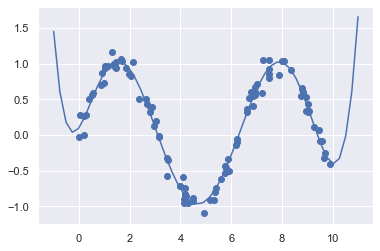

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

print('The R^2 score for the fit is: ', poly_model.score(x[:, np.newaxis], y))

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

1. The trigonometric sine function with some random noise was used to simulate the data points.

2. A polynomial of degree 7 was used for the basis functions.

3. The linear model provided an excellent fit to the non-linear data. This is supported by the R^2 score being very close to 1.

Next we write code to find the best degree/order for the polynomial basis functions (between 1 and 15) by computing the quality of the fit using a suitable metric, in this case the $R^2$ coefficient (which can be computed using the `score()` function). 

**The best possible score is 1.0**. The score can be negative (because the model can be arbitrarily worse). A score of 0 suggests a constant model that always predicts the expected value of y, disregarding the input features.

The R^2 score for the fit of degree 1 is:  0.012172236970290462
The R^2 score for the fit of degree 2 is:  0.20041267204540558
The R^2 score for the fit of degree 3 is:  0.2401026445679344
The R^2 score for the fit of degree 4 is:  0.9010949501596226
The R^2 score for the fit of degree 5 is:  0.9178981253300188
The R^2 score for the fit of degree 6 is:  0.980354677462121
The R^2 score for the fit of degree 7 is:  0.9806993128749502
The R^2 score for the fit of degree 8 is:  0.9815395575076702
The R^2 score for the fit of degree 9 is:  0.9815556828827701
The R^2 score for the fit of degree 10 is:  0.9817554326414029
The R^2 score for the fit of degree 11 is:  0.9817593861451424
The R^2 score for the fit of degree 12 is:  0.981763065791016
The R^2 score for the fit of degree 13 is:  0.9819417772036413
The R^2 score for the fit of degree 14 is:  0.9817712176762966
The R^2 score for the fit of degree 15 is:  0.9812918693173667


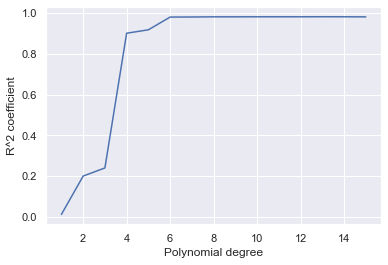

In [19]:
poly_model_scores=[]

for i in range(1, 16):
    poly_model = make_pipeline(PolynomialFeatures(i),
                           LinearRegression())

    rng = np.random.RandomState(1)
    x = 10 * rng.rand(100)
    y = np.sin(x) + 0.1 * rng.randn(100)

    poly_model.fit(x[:, np.newaxis], y)
    yfit = poly_model.predict(xfit[:, np.newaxis])

    print('The R^2 score for the fit of degree ' + str(i) +' is: ', poly_model.score(x[:, np.newaxis], y))
    
    poly_model_scores.append(poly_model.score(x[:, np.newaxis], y))
    
i_s=[x for x in range (1, 16)]

plt.plot(i_s, poly_model_scores)

plt.xlabel("Polynomial degree")
plt.ylabel("R^2 coefficient")

plt.show()

4. The polynomial of degree 13 produced the highest $R^2$ coefficient.

5. I would not use this polynomial as my model. It fits too perfectly to the data and may not fit well to some new instances.

6. I would use a polynomial of degree 4 as my regression model. Past this point, the change in $R^2$ is negligible enough to not warrant an increase in model complexity.

## Regularization

The use of polynomial regression with high-order polynomials can very quickly lead to over-fitting. In this part, we will look into the use of regularization to address potential overfitting.

The code below shows an attempt to fit a 15th degree polynomial to a sinusoidal shaped data. The fit is excellent ($R^2$ > 0.98), but might raise suspicions that it will lead to overfitting.

0.9812918693173667


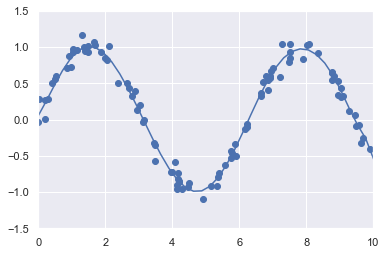

In [20]:
model = make_pipeline(PolynomialFeatures(15),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

Next we write Python code to perform Ridge regression ($L_2$ Regularization), plot the resulting fit, and compute the $R^2$ score.

0.9812918693173667


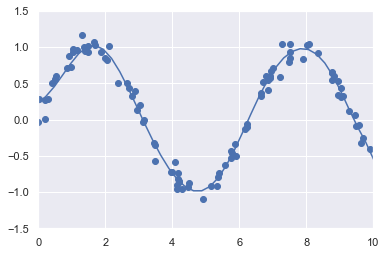

In [23]:
from sklearn.linear_model import Ridge, Lasso

model = make_pipeline(PolynomialFeatures(15),
                      Ridge())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

Next we write Python code to perform Lasso regression ($L_1$ Regularization), plot the resulting fit, and compute the $R^2$ score.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.656028792474519, tolerance: 0.042480145591765626
  positive)


0.9812918693173667


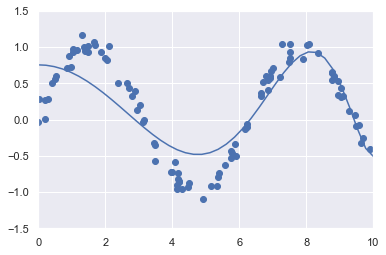

In [27]:
model = make_pipeline(PolynomialFeatures(15),
                      Lasso(alpha=0.45, tol=.001))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

7. Ridge regularization produced a better fit and was easier to fine-tune.

The Boston housing dataset is a classic dataset used in linear regression examples.
(See https://scikit-learn.org/stable/datasets/index.html#boston-dataset for more)

The Python code below:
- Loads the Boston dataset (using scikit-learn's `load_boston()`) and converts it into a Pandas dataframe
- Selects two features to be used for fitting a model that will then be used to make predictions: LSTAT (% lower status of the population) and RM (average number of rooms per dwelling) (\*)
- Splits the data into train and test sets

(\*) See https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 for details.

In [28]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [29]:
boston['MEDV'] = boston_dataset.target
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)
